In [3]:
import os
import time
import json
import datetime
import numpy as np
import pandas as pd
import pickle

In [10]:
import seaborn as sns
from plotly import express as px

In [4]:
%%time
submit = json.load(open('./data/sample_submission/sample_submission.json', 'r', encoding='utf8')) 
df_dic = pickle.load(open('./mydata/df_dic.plk','rb'))
plc_lst = pickle.load(open('./mydata/plc_lst.plk','rb'))
fct_lst = ['pH', 'COD', 'SS', 'N', 'P', 'T']

CPU times: user 839 ms, sys: 116 ms, total: 955 ms
Wall time: 955 ms


In [6]:
df_dic[plc_lst[0]]

,ds,pH,COD,SS,N,P,T
0,20100101,0.483936,1.273783,1.364365,1.268182,1.148905,0.115951
1,20100102,0.483936,1.150021,1.280543,1.392281,0.544579,0.115951
2,20100103,0.877648,0.94375,1.029079,1.363081,0.678874,0.115951
3,20100104,0.877648,0.861242,1.615829,1.903861,1.23549,0.115951
4,20100105,0.877648,0.654972,1.112901,2.235863,1.403358,0.115951
...,...,...,...,...,...,...,...
2815,20180127,2.058786,0.366194,1.448186,2.200823,-1.024548,-0.136248
2816,20180128,2.058786,0.32494,1.615829,1.963429,-0.983906,-0.136248
2817,20180129,2.058786,0.366194,1.532008,1.933645,-1.010412,-0.136248
2818,20180130,1.665074,1.108767,1.532008,2.450481,-0.992741,-0.136248


In [8]:
df = df_dic[plc_lst[0]]

/ssd/jaewoo/anaconda3/envs/ts/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ds', ylabel='pH'>

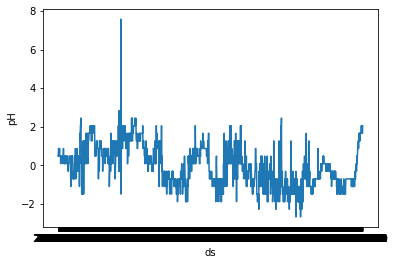

In [9]:
sns.lineplot(x = df.ds , y = df.pH)

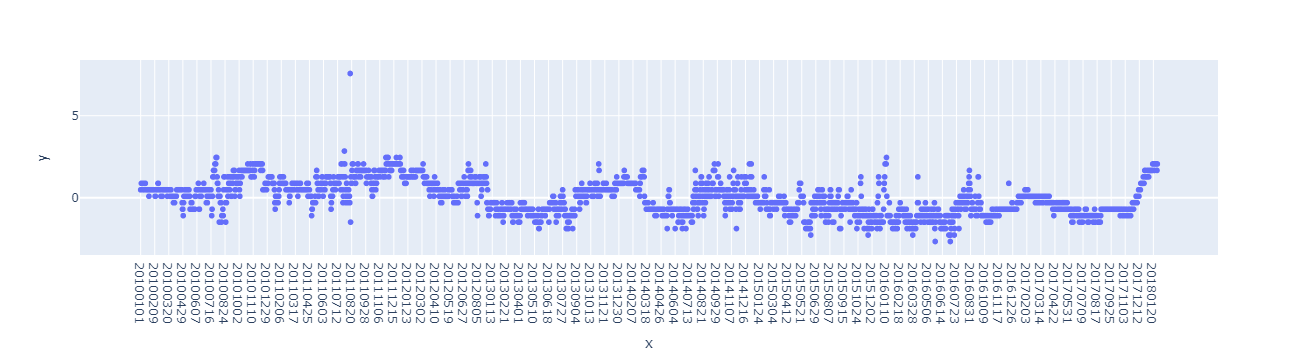

In [12]:
fig = px.scatter(x = df.ds , y = df.pH)
fig.show()